In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/kaggle/input/futureasteroids/future.csv'
data = pd.read_csv(file_path)

# Inspect the column names
print("Original column names:")
print(data.columns)

Original column names:
Index(['Object', 'Close-Approach (CA) Date (TDB)YYYY-mmm-DD HH:MM',
       'CA DistanceNominal(LD', 'CA DistanceMinimum(LD', 'Vrelative(km',
       'Vinfinity(km', 'Nsigma', 'H(mag)', 'ref', 'class'],
      dtype='object')


In [2]:
# List of columns to convert
columns_to_convert = [
    'Close-Approach (CA) Date (TDB)YYYY-mmm-DD HH:MM',
    'CA DistanceNominal(LD',
    'CA DistanceMinimum(LD',
    'Vrelative(km',
    'Vinfinity(km',
    'Nsigma',
    'H(mag)'
]

# Verify if columns exist
missing_columns = [col for col in columns_to_convert if col not in data.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Convert appropriate columns to datetime and numeric types
    data['Close-Approach (CA) Date (TDB)YYYY-mmm-DD HH:MM'] = pd.to_datetime(data['Close-Approach (CA) Date (TDB)YYYY-mmm-DD HH:MM'], errors='coerce')
    data['CA DistanceNominal(LD'] = pd.to_numeric(data['CA DistanceNominal(LD'], errors='coerce')
    data['CA DistanceMinimum(LD'] = pd.to_numeric(data['CA DistanceMinimum(LD'], errors='coerce')
    data['Vrelative(km'] = pd.to_numeric(data['Vrelative(km'], errors='coerce')
    data['Vinfinity(km'] = pd.to_numeric(data['Vinfinity(km'], errors='coerce')
    data['Nsigma'] = pd.to_numeric(data['Nsigma'], errors='coerce')
    data['H(mag)'] = pd.to_numeric(data['H(mag)'], errors='coerce')

    # Check the data types again
    print(data.dtypes)

Missing columns: ['Close-Approach (CA) Date (TDB)YYYY-mmm-DD HH:MM']


In [3]:
# Generate descriptive statistics
desc_stats = data.describe()
desc_stats


,CA DistanceNominal(LD,CA DistanceMinimum(LD,Vrelative(km,Vinfinity(km,Nsigma,ref
count,550.000000,550.000000,550.000000,550.000000,5.500000e+02,550.000000
mean,6.276618,6.110582,10.778182,10.709927,4.580220e+05,9.458182
std,4.243633,4.138228,5.226283,5.241401,5.090744e+06,19.572784
min,0.040000,0.030000,1.160000,0.990000,3.350000e+00,1.000000
25%,2.570000,2.540000,7.177500,7.027500,5.277500e+02,3.000000
50%,6.030000,5.860000,9.795000,9.725000,1.090000e+03,5.000000
75%,9.155000,8.872500,13.612500,13.560000,2.855000e+03,10.000000
max,19.450000,19.440000,38.570000,38.570000,8.770000e+07,355.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


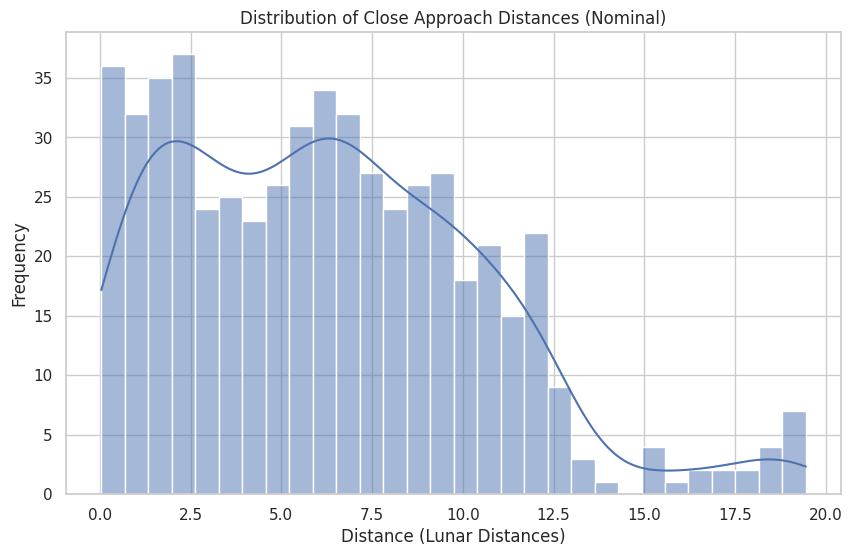

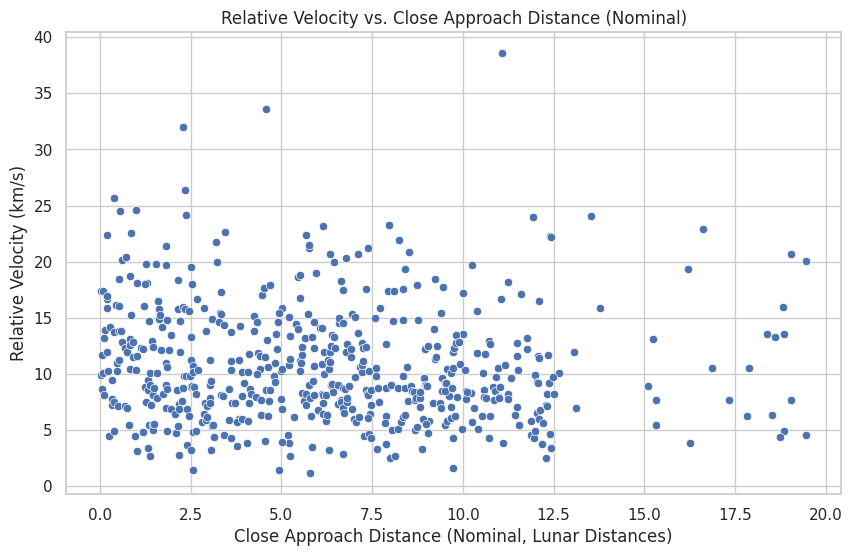

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


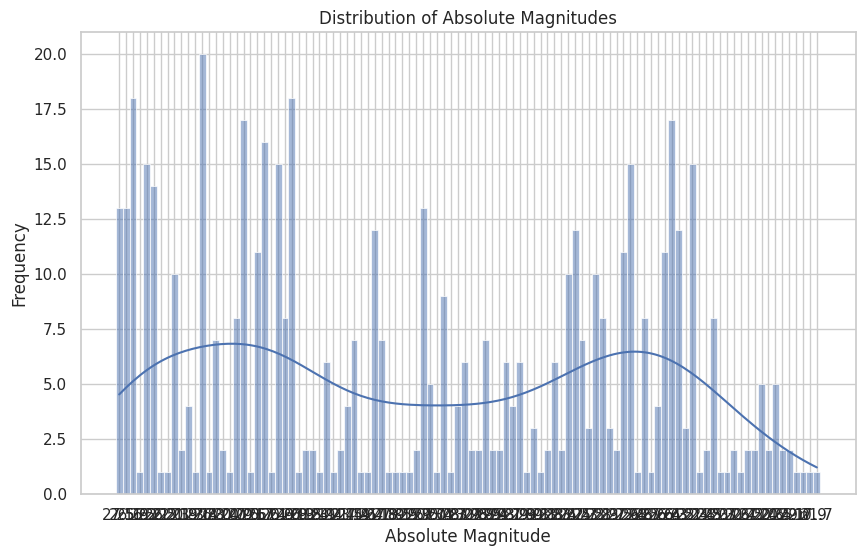

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting environment
sns.set(style="whitegrid")

# Distribution of Close Approach Distances (Nominal)
plt.figure(figsize=(10, 6))
sns.histplot(data['CA DistanceNominal(LD'], bins=30, kde=True)
plt.title('Distribution of Close Approach Distances (Nominal)')
plt.xlabel('Distance (Lunar Distances)')
plt.ylabel('Frequency')
plt.show()

# Relationship between Relative Velocity and Close Approach Distance (Nominal)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CA DistanceNominal(LD', y='Vrelative(km', data=data)
plt.title('Relative Velocity vs. Close Approach Distance (Nominal)')
plt.xlabel('Close Approach Distance (Nominal, Lunar Distances)')
plt.ylabel('Relative Velocity (km/s)')
plt.show()

# Distribution of Absolute Magnitudes
plt.figure(figsize=(10, 6))
sns.histplot(data['H(mag)'], bins=30, kde=True)
plt.title('Distribution of Absolute Magnitudes')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Frequency')
plt.show()
